In [1]:
from Bio import SeqIO
import numpy as np
from typing import List
import importlib
import fileDistanceProcessing as fdp
import importlib
importlib.reload(fdp) 

<module 'fileDistanceProcessing' from '/home/marko/Desktop/ip2/ip2_projekat/source/fileDistanceProcessing.py'>

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
X_train, X_test, y_train, y_test = fdp.train_test_virus()

In [4]:
def get_gram(X1, X2, kernel):
    return np.array([[kernel(X1[i], X2[j]) for j in range(len(X2))] for i in range(len(X1))])

In [5]:
distances = fdp.deserialize_and_decompress_distance_matrix("../data/full_distances_matrix.7z")

# metrika zasnovana samo na 5-adic distanci
# instant racunanje iz matrice
def five_adic_distance_from_matrix(x, y):

    i = int(x[-1]) #indeks je na poslednjem mestu u listi
    j = int(y[-1])

    # matrica je u obliku trougla bez dijagonale originalne matrice
    first = min(i, j)
    second = max(i, j) - (first + 1) # veci indeks smanji za broj instanci u redu matrice do dijagonale 

    return 0 if i == j else -distances[first][second] #udaljenost x od y

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

def visualize_confusion_matrix(cm, labels, save_path=""):
    """
    Funkcija za prikaz matrice konfuzije sa bojama:
    - Dijagonala: Zelena
    - Greške: Crvene
    - Ostalo: Belo

    Parametri:
    cm : Matrica konfuzije.
    labels : Lista labela (naziva klasa).
    save_path : Putanja za čuvanje slike. Ako se izostavi slika se ne čuva.
    """
    
    mask_diagonal = np.eye(len(cm), dtype=bool)
    mask_errors = ~mask_diagonal

    # Postavljanje boja
    cmap = sns.color_palette(["white"])  
    cmap_diagonal = sns.color_palette(["lightgreen"])  
    cmap_errors = sns.color_palette(["red"])  

    colors = np.array([[cmap[0]] * len(cm)] * len(cm))

    # Postavljanje boja za dijagonalu
    colors[mask_diagonal] = cmap_diagonal[0]

    # Postavljanje boja za greške
    colors[mask_errors & (cm > 0)] = cmap_errors[0]

    # Vizualizacija
    plt.figure(figsize=(11.69, 8.27), dpi=600)  # A4 format (11.69x8.27 inča)
    ax = sns.heatmap(
        cm, 
        annot=True,  # Ispis vrednosti u ćelijama
        fmt='d',  # Formatiranje kao celi brojevi
        cmap=cmap,  # Osnovna boja (belo)
        xticklabels=labels, 
        yticklabels=labels, 
        mask=False,  # Ne maskiramo nule
        cbar=False,  # Bez colorbar-a
        annot_kws={"size": 10, "color": "black"},  # Povećan font za brojeve i crna boja teksta
        linewidths=0,  # Bez linija između ćelija (ručno ćemo ih dodati)
        square=True  # Čini ćelije kvadratnim
    )

    # dodavanje linija između ćelija
    for i in range(len(cm) + 1):
        ax.axhline(i, color='black', linewidth=0.5)  # Horizontalne linije
        ax.axvline(i, color='black', linewidth=0.5)  # Vertikalne linije

    plt.gca().add_collection(plt.pcolormesh(np.arange(len(cm) + 1), np.arange(len(cm) + 1), colors, shading='flat'))
    plt.xlabel('Predviđene klase', fontsize=14)  # Povećan font za oznake
    plt.ylabel('Stvarne klase', fontsize=14)  # Povećan font za oznake
    plt.xticks(fontsize=12)  # Povećan font za x-ose
    plt.yticks(fontsize=12)  # Povećan font za y-ose

    # Čuvanje slike ako je putanja navedena
    if save_path!="": #and save_path!="train_" and save_path!="test_" :
        plt.savefig("../results/heatmaps/svm/"+save_path+".png", bbox_inches='tight', dpi=600)  # Visoka rezolucija
    plt.show()
    plt.close()

## Model 1

In [7]:
clf1 = svm.SVC(kernel = "precomputed")
clf1.fit(get_gram(X_train, X_train, five_adic_distance_from_matrix), y_train)

/home/marko/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='precomputed')

In [8]:
y_pred = clf1.predict(get_gram(X_test, X_train, five_adic_distance_from_matrix))

In [9]:
print(f'Accuracy on Custom Kernel: {accuracy_score(y_test, y_pred)}')

Accuracy on Custom Kernel: 0.9993114528345192


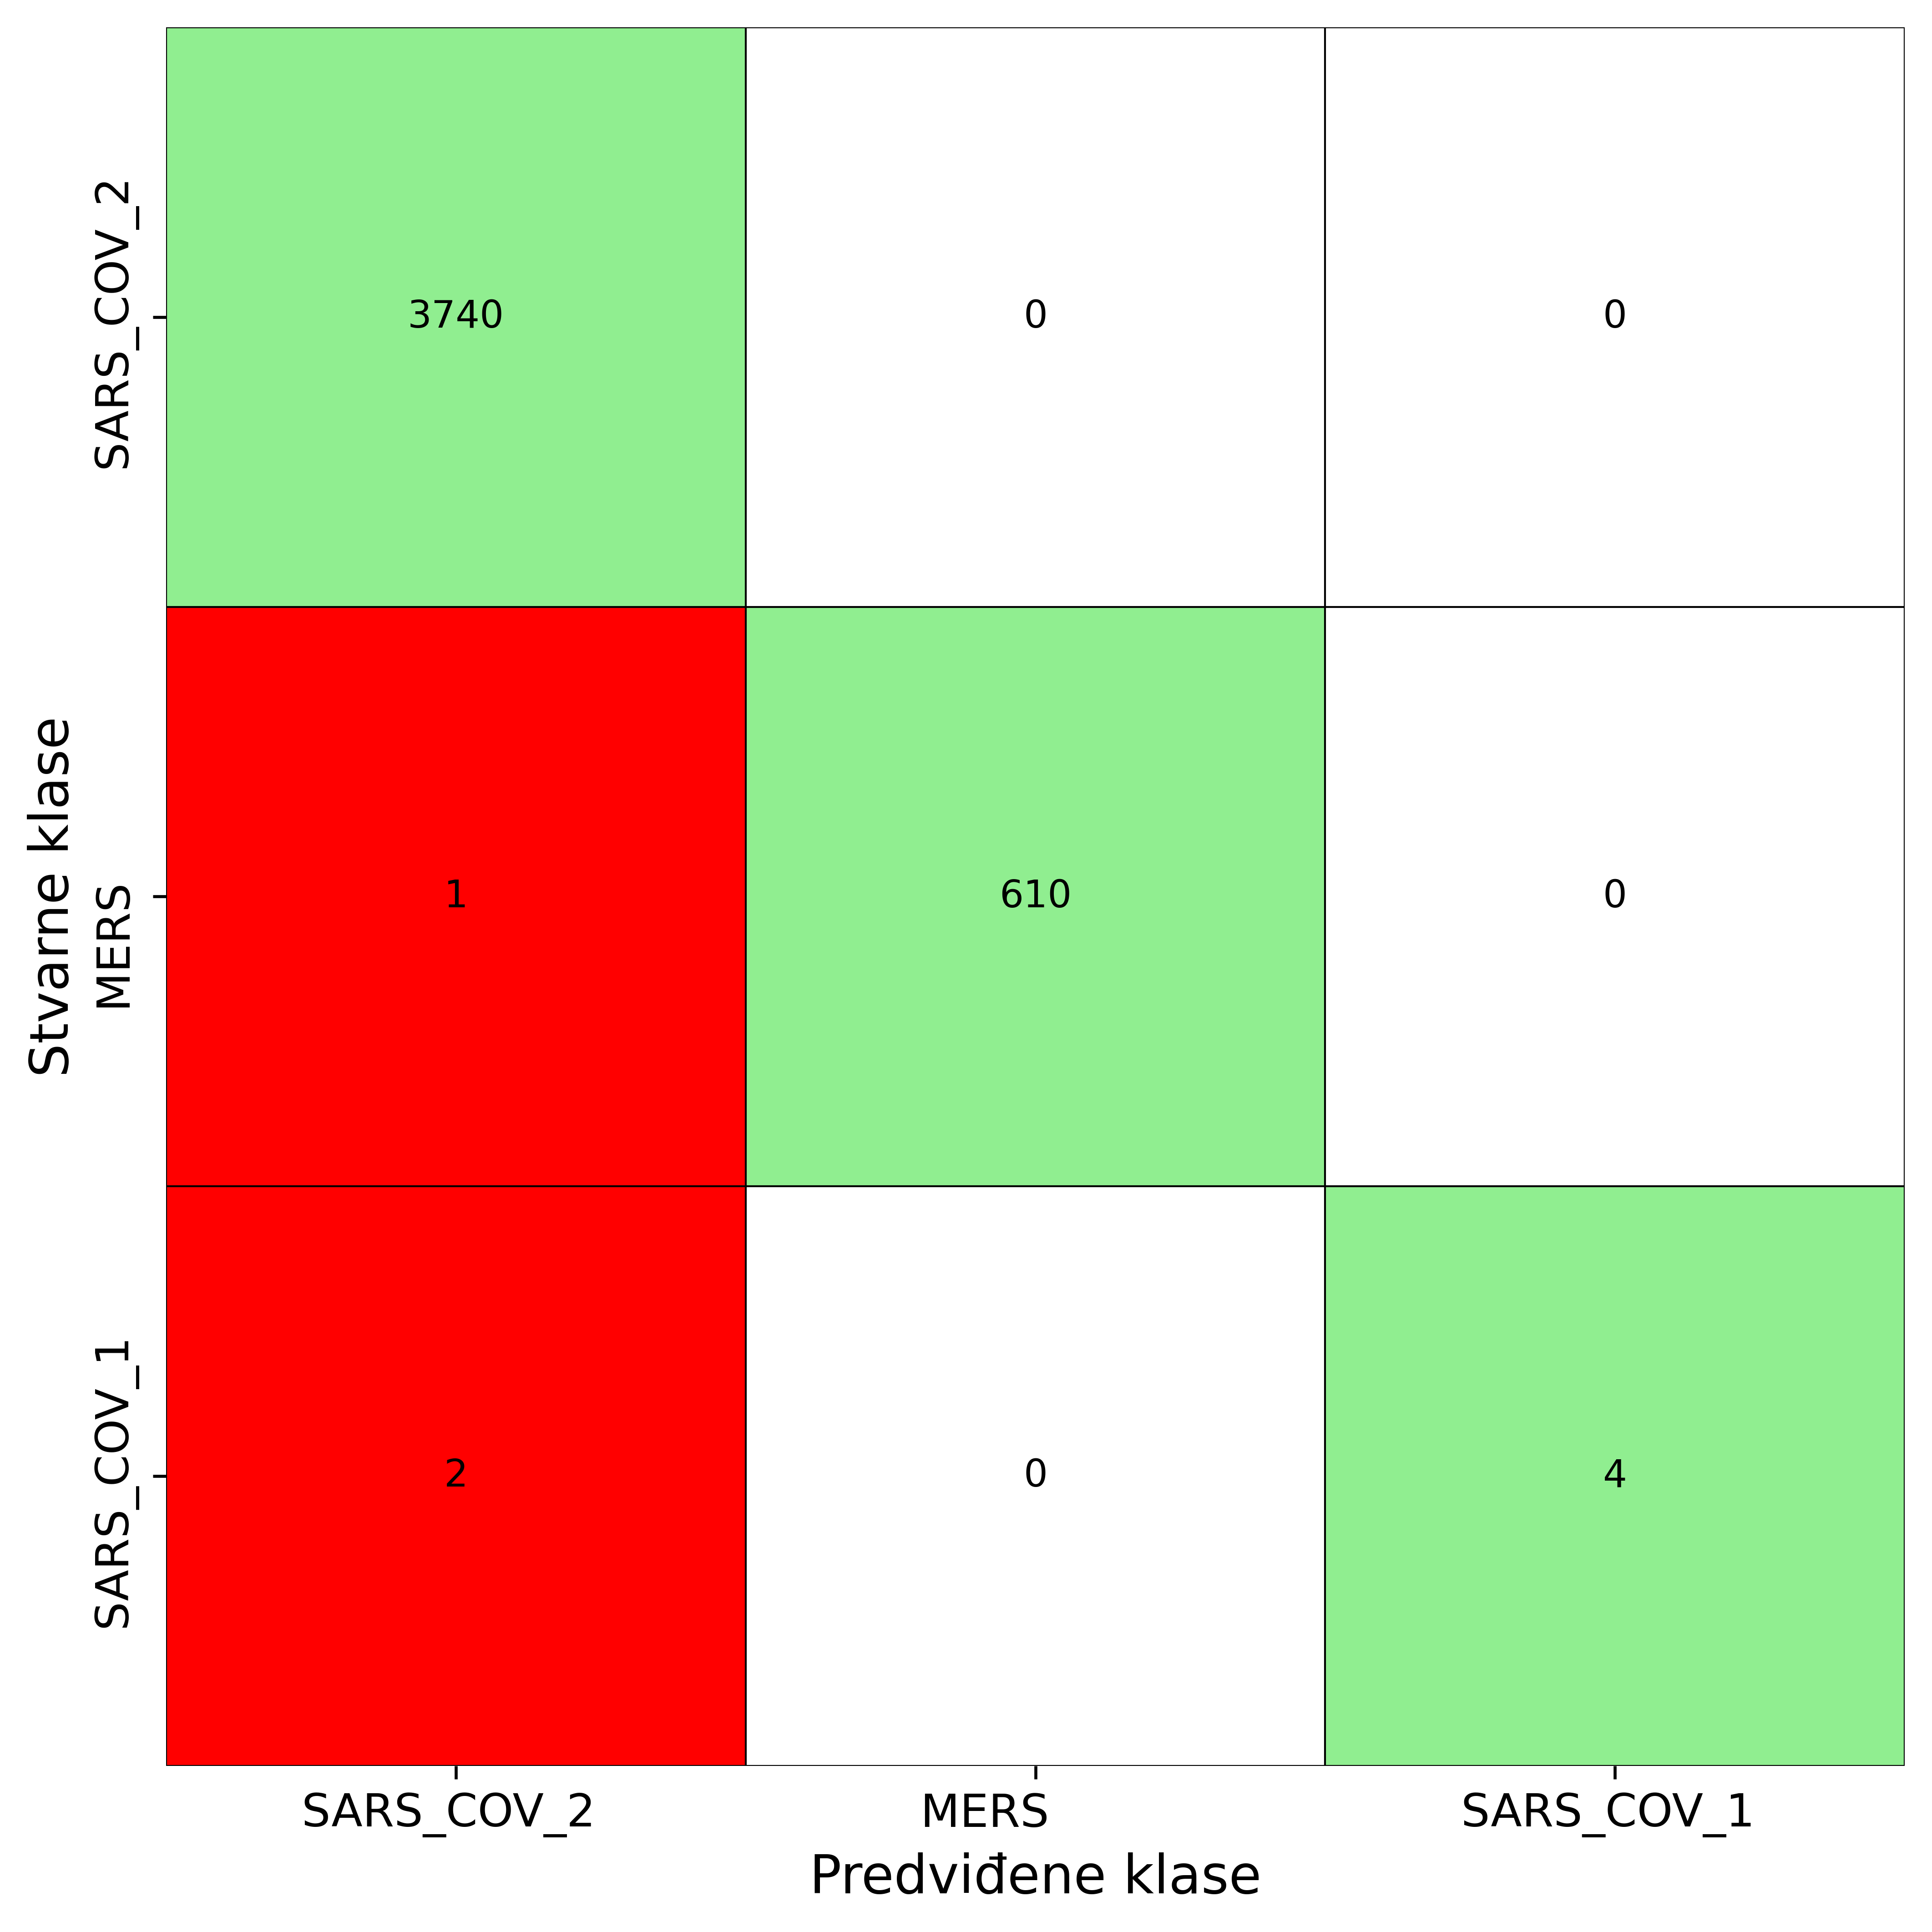

In [10]:
labels = y_test["Virus"].unique()
cm = confusion_matrix(y_test, y_pred, labels=labels)
visualize_confusion_matrix(cm, labels, save_path = "virus")

## Model 2

In [11]:
X_train, X_test, y_train, y_test = fdp.train_test_protein()

In [12]:
clf1.fit(get_gram(X_train, X_train, five_adic_distance_from_matrix), y_train)

/home/marko/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='precomputed')

In [13]:
y_pred = clf1.predict(get_gram(X_test, X_train, five_adic_distance_from_matrix))

In [14]:
print(f'Accuracy on Custom Kernel: {accuracy_score(y_test, y_pred)}')

Accuracy on Custom Kernel: 0.9986229056690383


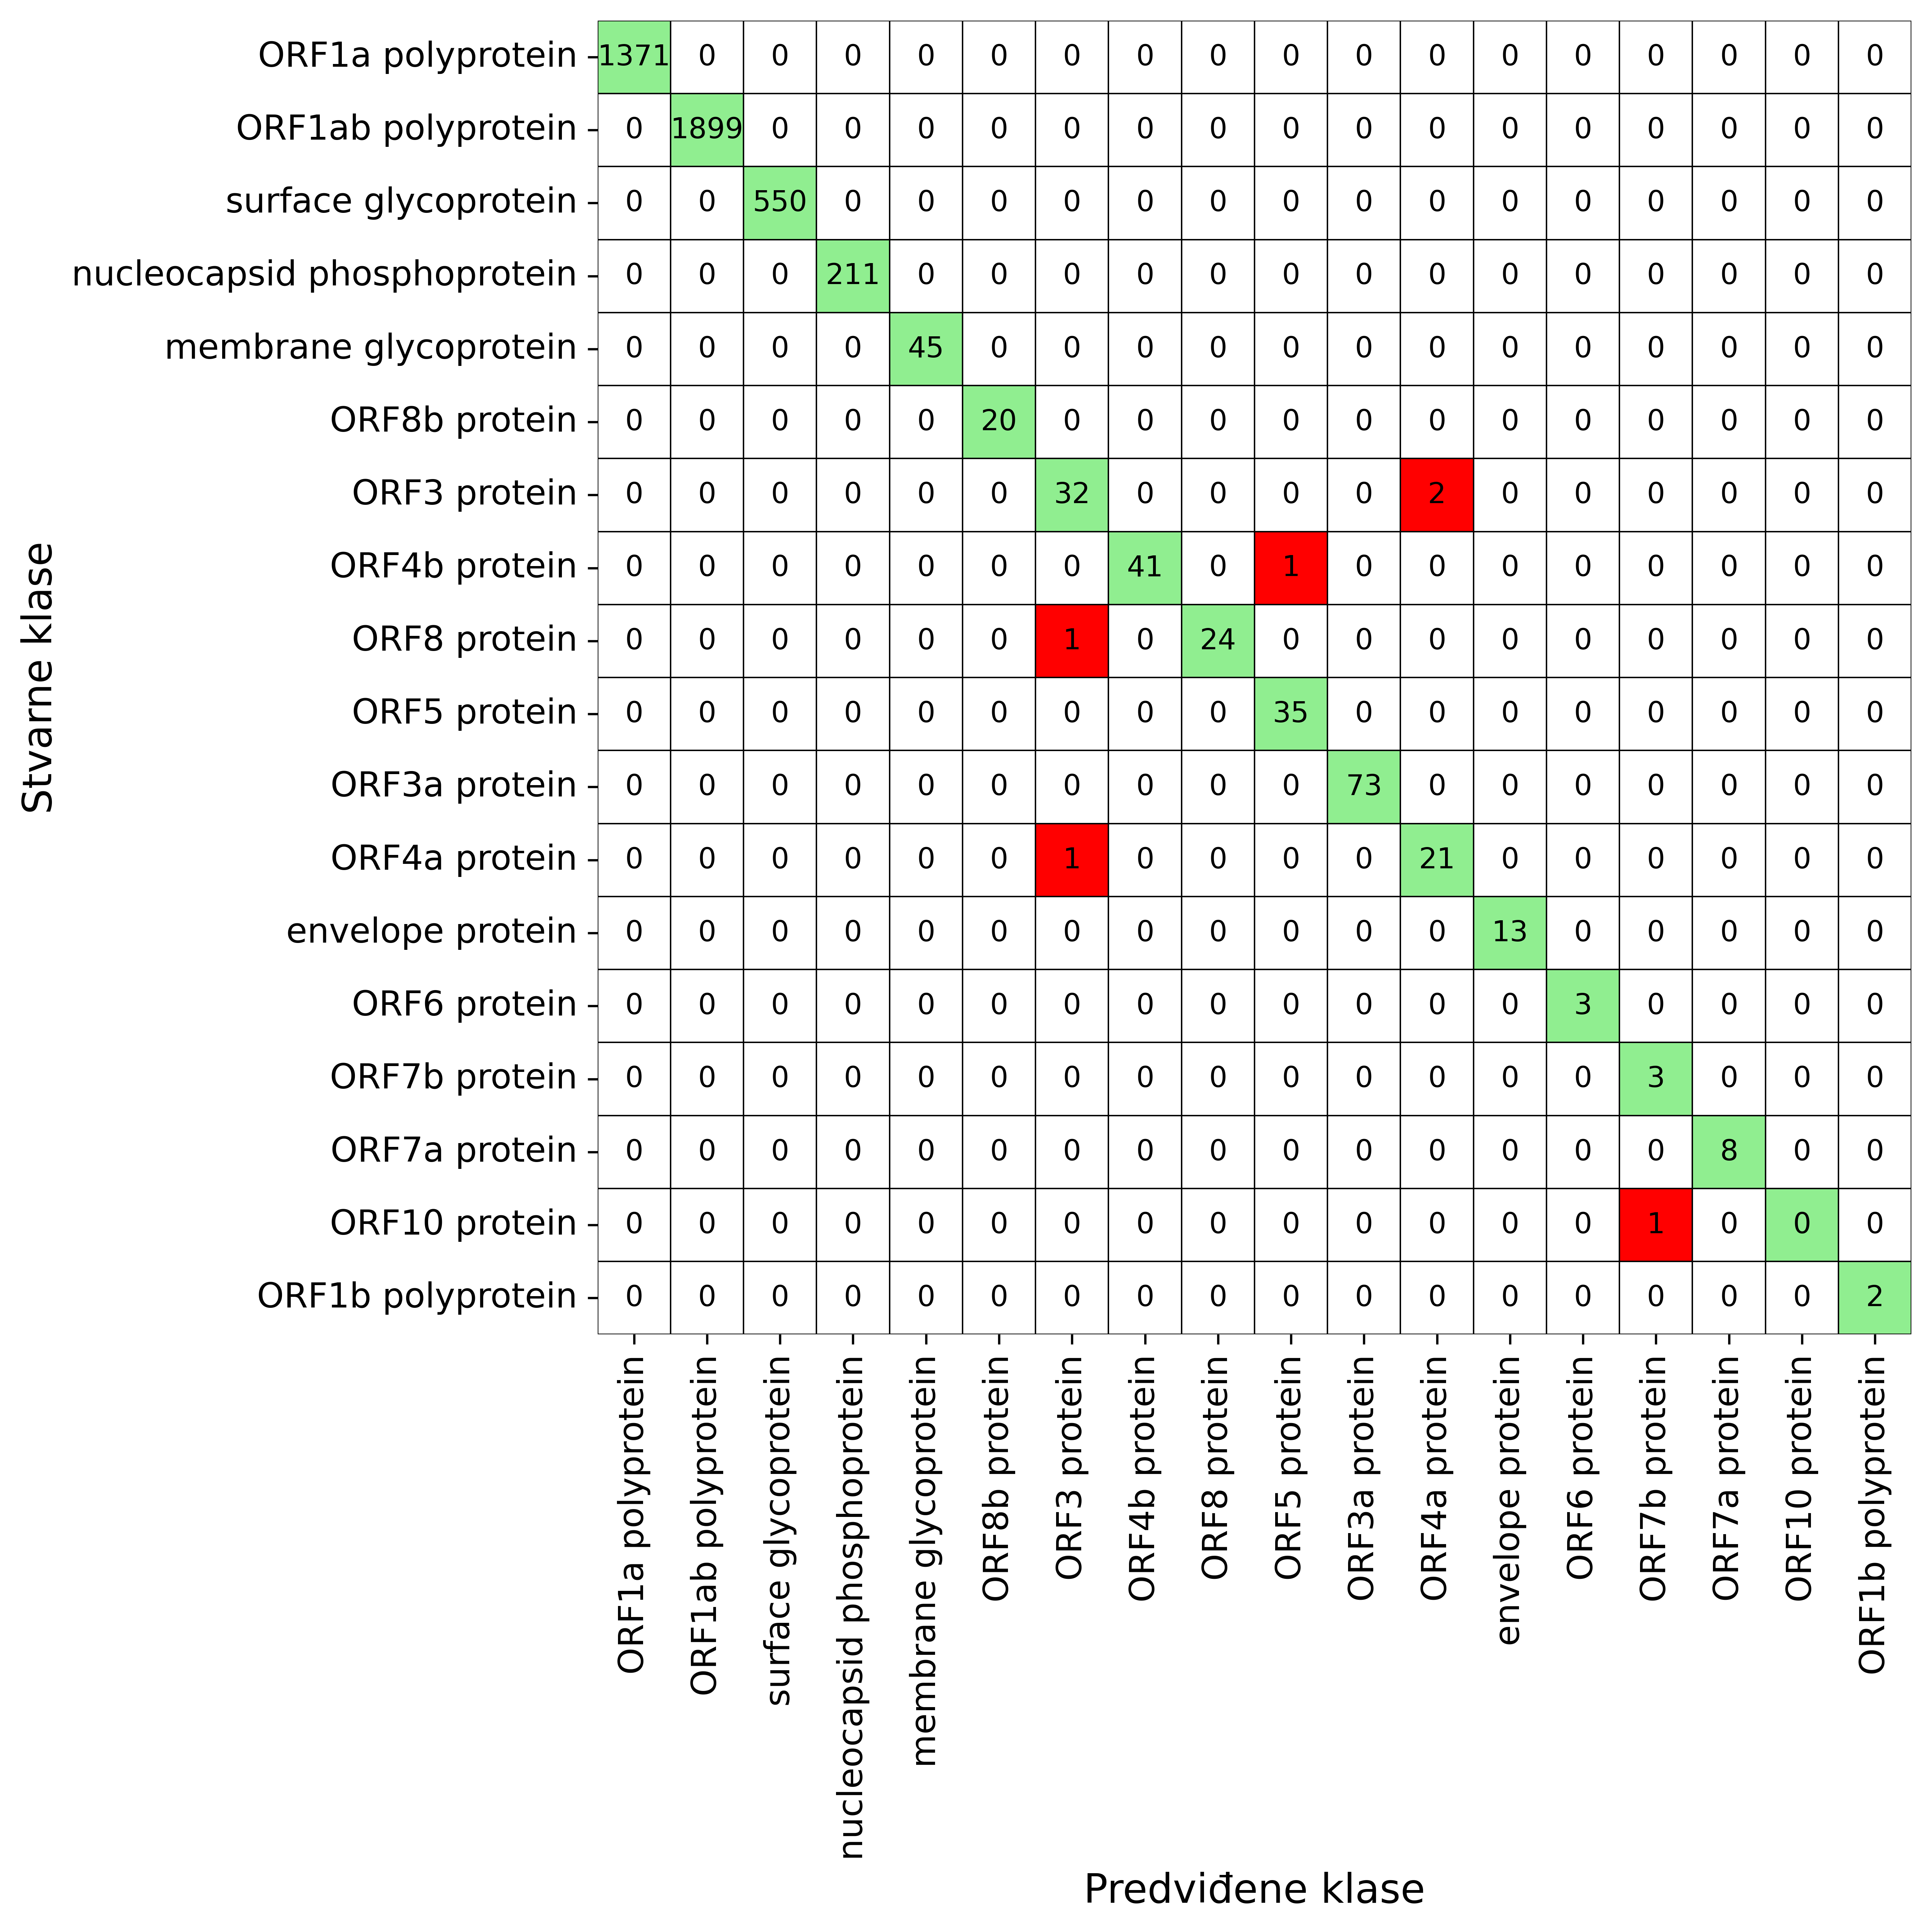

In [19]:
labels = y_test["PROTEIN"].unique()
cm = confusion_matrix(y_test, y_pred, labels=labels)
visualize_confusion_matrix(cm, labels, save_path = "protein")

## Model 3

In [20]:
X_train, X_test, y_train, y_test = fdp.train_test_sars2()

In [21]:
clf1.fit(get_gram(X_train, X_train, five_adic_distance_from_matrix), y_train)

/home/marko/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='precomputed')

In [22]:
y_pred = clf1.predict(get_gram(X_test, X_train, five_adic_distance_from_matrix))

In [23]:
print(f'Accuracy on Custom Kernel: {accuracy_score(y_test, y_pred)}')

Accuracy on Custom Kernel: 0.9713903743315508


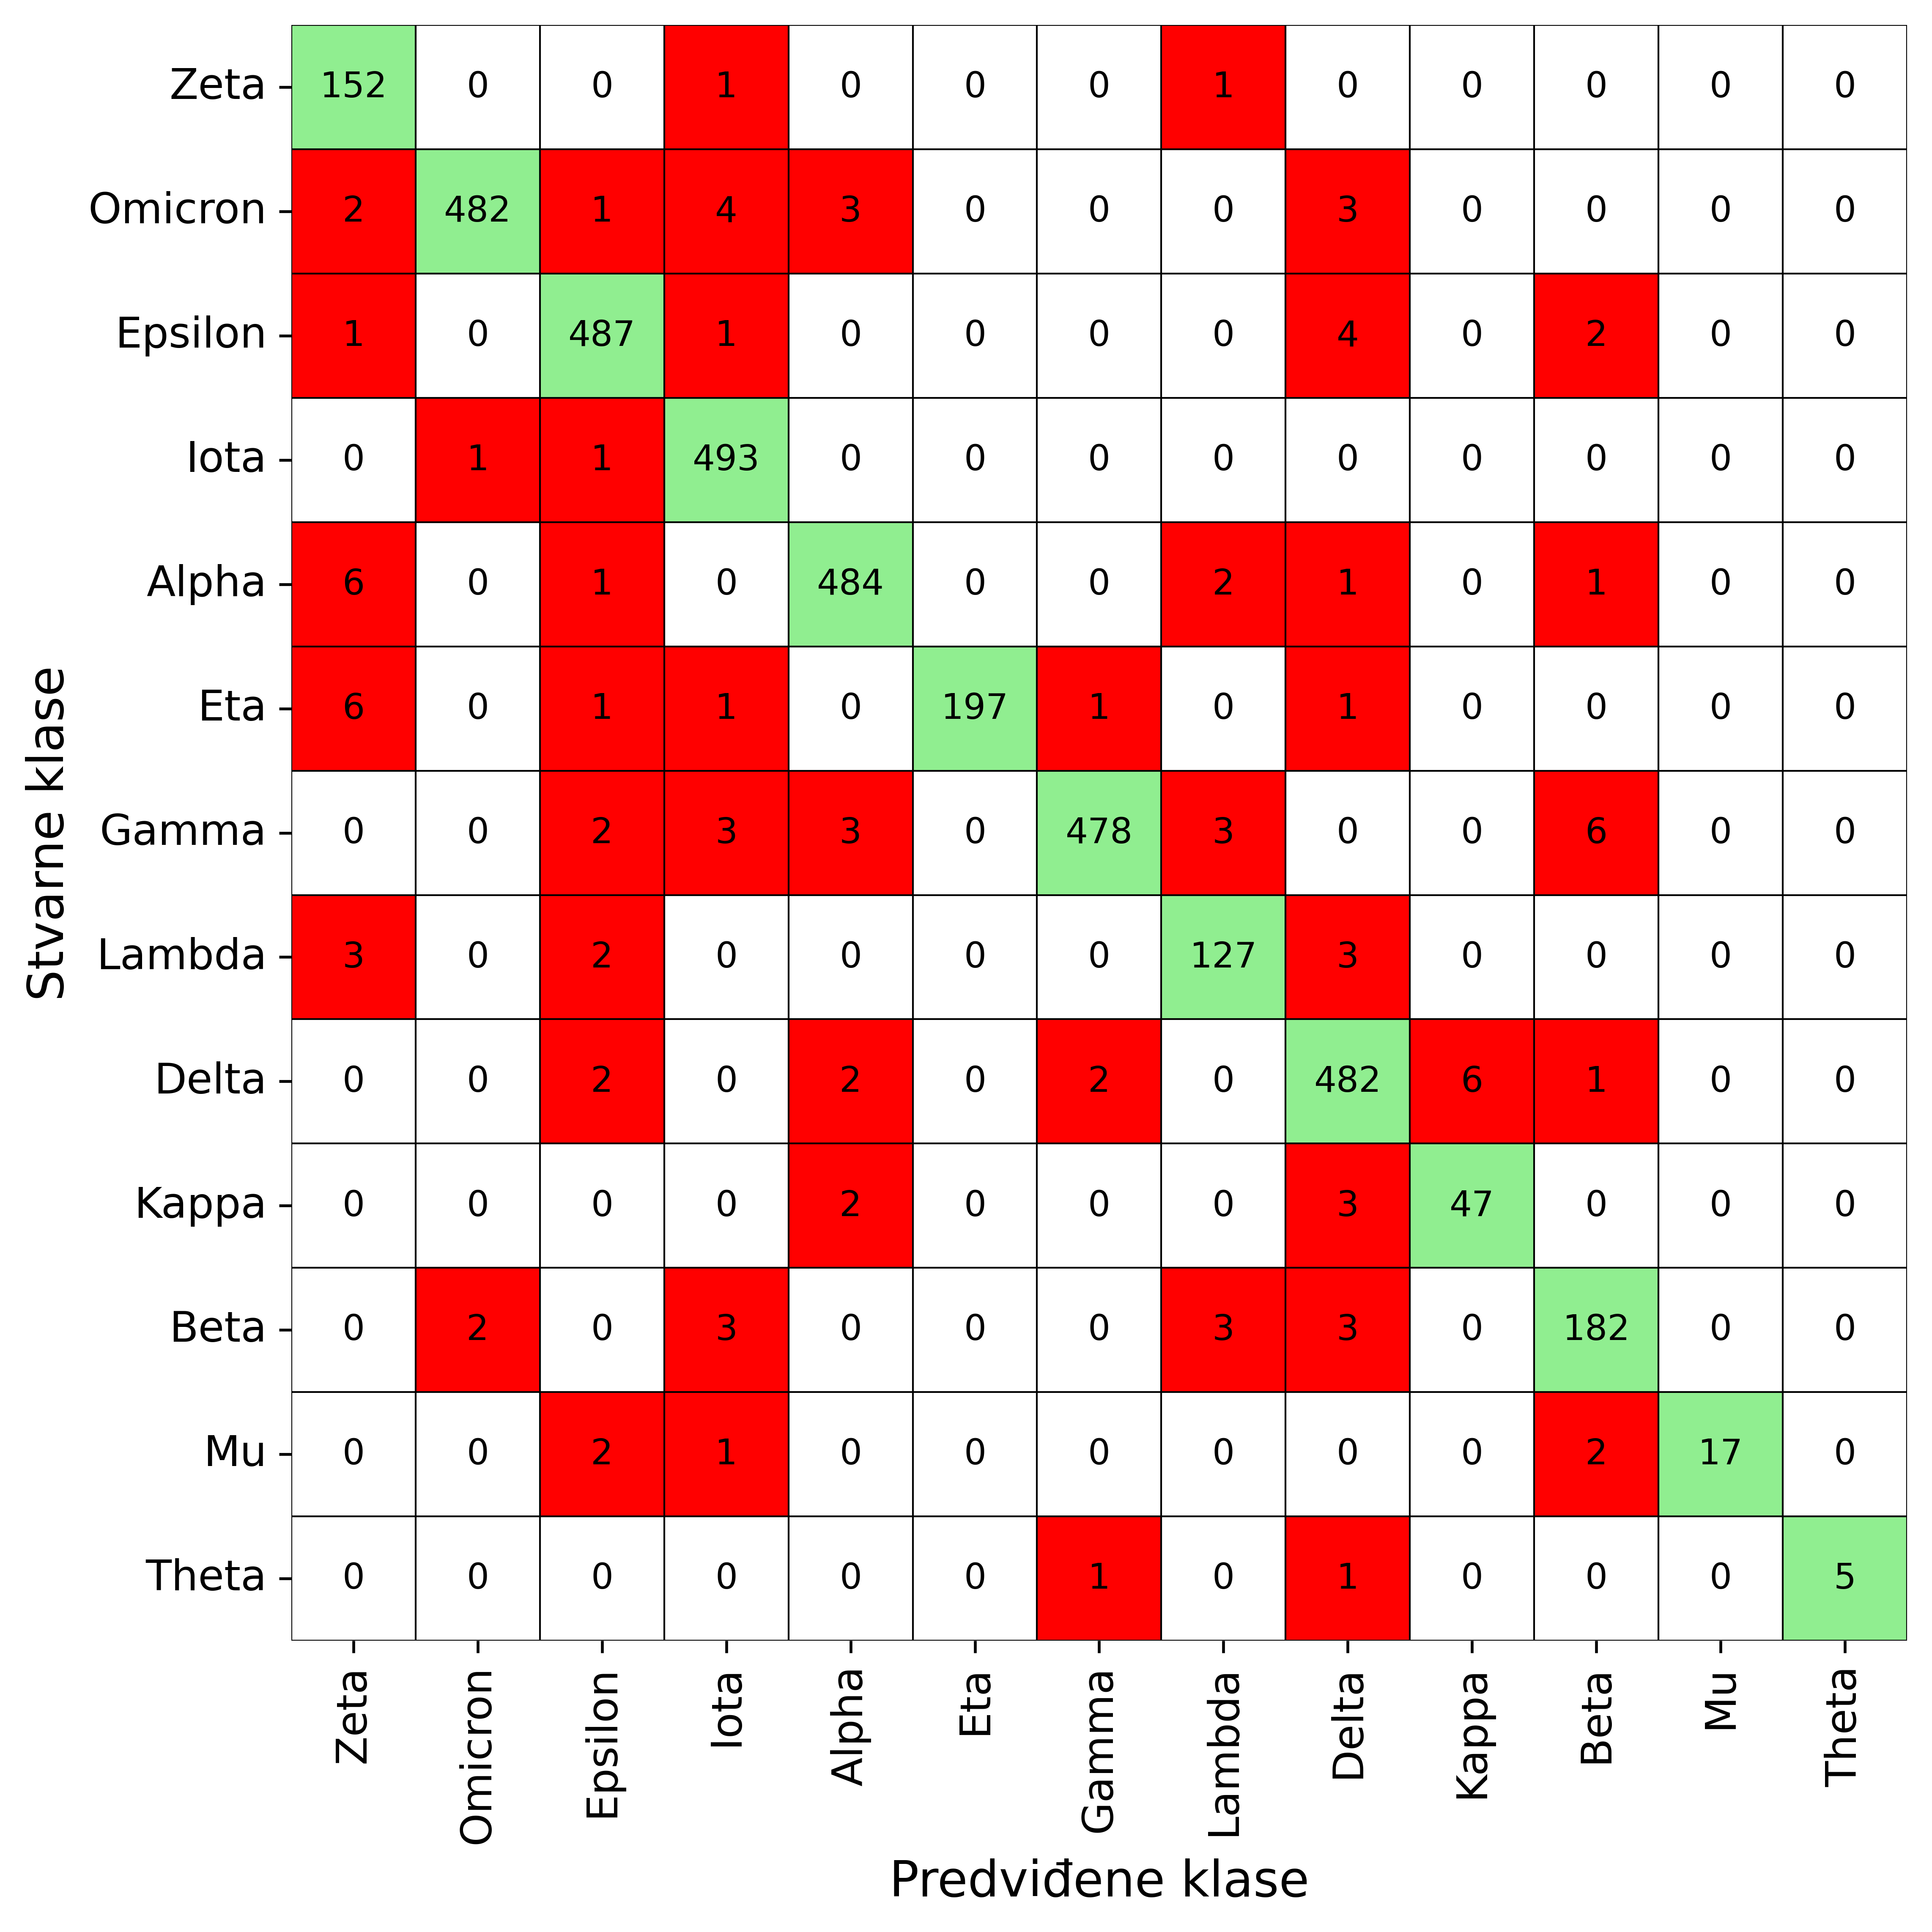

In [27]:
labels = y_test["WHO_TYPE"].unique()
cm = confusion_matrix(y_test, y_pred, labels=labels)
visualize_confusion_matrix(cm, labels, save_path = "sars2")